***COVID 19 OUTBREAK ANALYSIS AND VISUALIZATION***

**Importing all of the dependencies**

In [50]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
import sklearn.datasets


In [3]:
dataset1 = pd.read_csv("covid.csv")



In [4]:
dataset1.head()


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [6]:
dataset1.shape

(209, 17)

In [7]:
dataset1.size

3553

In [9]:
#getting some more info
dataset1.info

<bound method DataFrame.info of             Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
3                   Russia         Europe  1.459409e+08      871894       NaN   
4             South Africa         Africa  5.938157e+07      538184       NaN   
..                     ...            ...           ...         ...       ...   
204             Montserrat  North America  4.992000e+03          13       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   
208         Western Sahara         Africa  5.986820e+05          10       NaN

In [10]:
dataset2 = pd.read_csv("covid_grouped.csv")
dataset2.head() 


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO


In [11]:
dataset2.shape

(35156, 11)

In [12]:
dataset2.size

386716

In [13]:
dataset2.info

<bound method DataFrame.info of              Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  N

**Dataset Alteration**



In [17]:
dataset1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [28]:
dataset1.dropna()
#dropping null values

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Bahamas,North America,3.936160e+05,761,14.0,91.0,656.0,1.0,1933.0,36.0,4814.0,12230.0,Americas,BHS
160,Guyana,South America,7.869360e+05,538,22.0,189.0,327.0,2.0,684.0,28.0,5165.0,6563.0,Americas,GUY
185,Monaco,Europe,3.927000e+04,125,4.0,105.0,16.0,2.0,3183.0,102.0,38209.0,972982.0,Europe,MCO
187,Antigua and Barbuda,North America,9.801000e+04,92,3.0,76.0,13.0,1.0,939.0,31.0,1500.0,15305.0,Americas,ATG


**Visualizing**


**Using plotly**

In [39]:
from plotly.figure_factory import create_table

colorscale = [[0, '#006767'], [.5, '#00cdcd'], [1, '#ffffff']]
table = create_table(dataset1.head(15), colorscale=colorscale)
py.iplot(table)


In [41]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases',color = 'TotalDeaths', height = 600,
hover_data = ['Country/Region', 'Continent'])
#bar graph

In [43]:
px.choropleth(dataset2,
			locations='iso_alpha',
			color="Deaths",
			hover_name="Country/Region",
			color_continuous_scale="Viridis",
			animation_frame="Date" )
#animation

In [44]:
correlation = dataset1.corr()

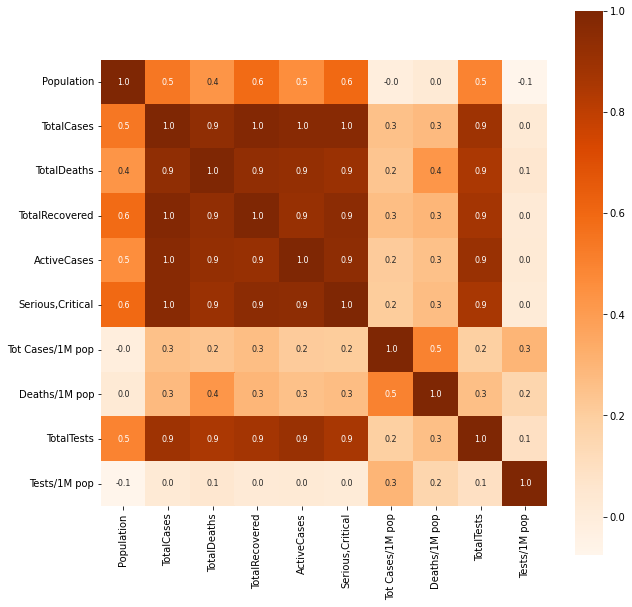

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Oranges')